In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')
X = dataset['v2']
y = dataset['v1']


from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_X.fit_transform(y)
print("y:\n",y)

corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['v2'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = MultinomialNB()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


y:
 [0 0 1 ... 0 0 0]
train score: 0.9937177473636976
test score: 0.9829596412556054


In [49]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[939  10]
 [  9 157]]
0.9829596412556054


In [59]:
dataset['b_labels'] = dataset['v1'].map({'ham': 0, 'spam': 1})
dataset['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = dataset[(dataset['predictions'] == 0) & (dataset['b_labels'] == 1)]['v2']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. Aå£1.5

In [60]:
# things that should not be spam
not_actually_spam = dataset[(dataset['predictions'] == 1) & (dataset['b_labels'] == 0)]['v2']
for msg in not_actually_spam:
  print(msg)

\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
S..antha num corrct dane
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
Ee msg na poortiyagi odalebeku: Hanumanji 7 name 1-Hanuman 2-Bajarangabali 3-Maruti 4-Pavanaputra 5-Sankatmochan 6-Ramaduth 7-Mahaveer ee 7 name  &lt;#&gt;  janarige ivatte kalisidare next saturday olage ondu good news keluviri...! Maretare inde 1 dodda problum nalli siguviri idu matra  &lt;#&gt; % true.. Don't neglet.
Unlimited texts. Limited minutes.
\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\""
Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
Mathews or tait or edwards or anderson
Urgh, coach hot, smells of chip fat! Thanks again, especially for the duvet (not a predictive text w

spam


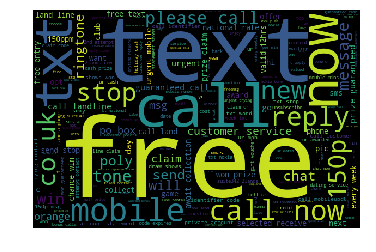

ham


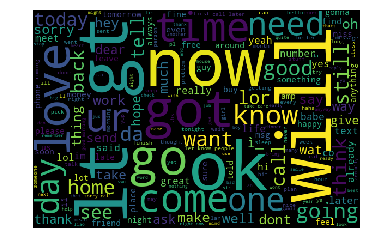

In [67]:
from wordcloud import WordCloud

# visualize the data
def visualize(label):
  print(label)
  words = ''
  for msg in dataset[dataset['v1'] == label]['v2']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')
